In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import warnings  
warnings.filterwarnings('ignore')

In [2]:
entre = pd.read_csv('data.csv')
entre

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Engineering Sciences,Yes,19,Male,Yes,Yes,4,5,4,3,4,4,5,Yes,Positivity,NaN,1
215,Engineering Sciences,Yes,19,Male,Yes,No,2,2,2,2,2,2,2,No,Work Ethic,Just not interested! (Want to work in the corp...,0
216,Engineering Sciences,Yes,22,Female,Yes,Yes,3,4,4,3,4,4,3,No,Vision,NaN,1
217,Engineering Sciences,No,19,Male,Yes,No,1,2,2,3,3,2,2,No,Passion,Lack of Knowledge,0


In [3]:
#Features Understanding
list(entre.columns)

['EducationSector',
 'IndividualProject',
 'Age',
 'Gender',
 'City',
 'Influenced',
 'Perseverance',
 'DesireToTakeInitiative',
 'Competitiveness',
 'SelfReliance',
 'StrongNeedToAchieve',
 'SelfConfidence',
 'GoodPhysicalHealth',
 'MentalDisorder',
 'KeyTraits',
 'ReasonsForLack',
 'y']

In [4]:
#check for dtypes
entre.dtypes
#they are in correct dtypes

EducationSector           object
IndividualProject         object
Age                        int64
Gender                    object
City                      object
Influenced                object
Perseverance               int64
DesireToTakeInitiative     int64
Competitiveness            int64
SelfReliance               int64
StrongNeedToAchieve        int64
SelfConfidence             int64
GoodPhysicalHealth         int64
MentalDisorder            object
KeyTraits                 object
ReasonsForLack            object
y                          int64
dtype: object

In [5]:
#check for nan
entre.isnull().sum()

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64

### NAN
    no nan except in ReasonsForLack features, 91 NAN and this is not good because we only have 219 samples
    it means 41% of total samples
    for the time being we should just remove this feature and see what happen with our predictive model later

In [6]:
entre.drop('ReasonsForLack', axis=1, inplace=True)
entre.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,1


In [7]:
#okay we are done with data cleaning

## Exploratory Data Analysis

In [8]:
#first thing first lets classify the features to numerical and categorical type

numerical_features = ['Age']

categorical_features = [i for i in list(entre.columns) if i != 'Age' and i != 'y']

target = entre['y']

#only 1 categorical features
#the rest is either categorical or ordinal discreet (still categorical but discreet and has clear order)

## Univariate Analysis

### Descriptive Statistic
### Numerical

In [9]:
entre[numerical_features].describe()

,Age
count,219.000000
mean,19.753425
std,1.289842
min,17.000000
25%,19.000000
50%,20.000000
75%,20.000000
max,26.000000


#### Age
    219 values
    Minimum age is 17
    maximum age is 26,  this is data  represent university student age
    mean of age is 19.75
    median is 20
    Since median and mean is close, the age feature might not have outliers 
    but since median is still slightly higer than mean, the data distribution might be bell-shaped but right-skewed with short tail
    standard deviation is 1.28, if our age feature follows normal distribution, then 68% of age will be around 18.47-21.03, lets say around 18-21 years old, and 95% of age will be around 17-22 years old
    

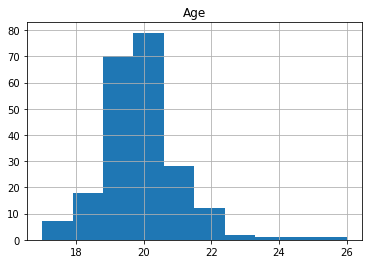

In [10]:
#Age histogram
entre[numerical_features].hist(bins=entre['Age'].nunique())
plt.show()

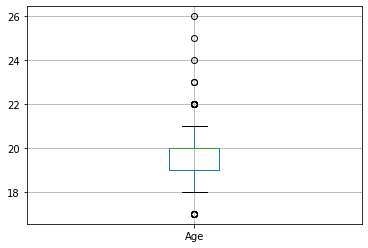

In [11]:
entre[numerical_features].boxplot()
#ax.set_xticklabels(list(heart_attack[numerical_features].columns))
plt.show()

### Distribution Analysis
    our histogram shows that age features is bell-shape with right-skewed and short tail
    Turns out there are outliers in our dataset
    probably because age values 17 and 22-26 is so little compare to other age values
    lets see the bar chart

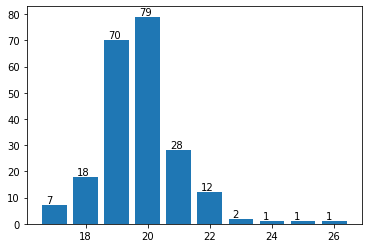

In [12]:
#Barplot of age
#count the value inside numerical variable and plot
#since our nuemrical feature is only one, we use value_counts instead of groupby
data = entre[numerical_features].value_counts().to_frame().rename(columns={0 : 'Counts'})
index = [i[0] for i in data.index]
ax = plt.bar(x=index, height=data['Counts'])
for bar in ax:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.12, yval + 0.7, yval) #parameter = x position, y position, and string
plt.show()

### Outliers
    I decide to drop outliers above age 22

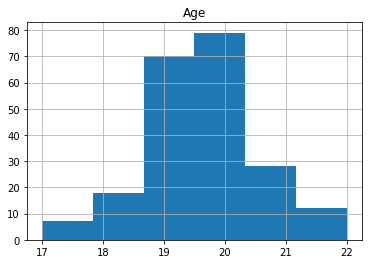

In [13]:
entre = entre[entre['Age'] <= 22]
entre[numerical_features].hist(bins=entre['Age'].nunique())
plt.show() #better

### Categorical Data

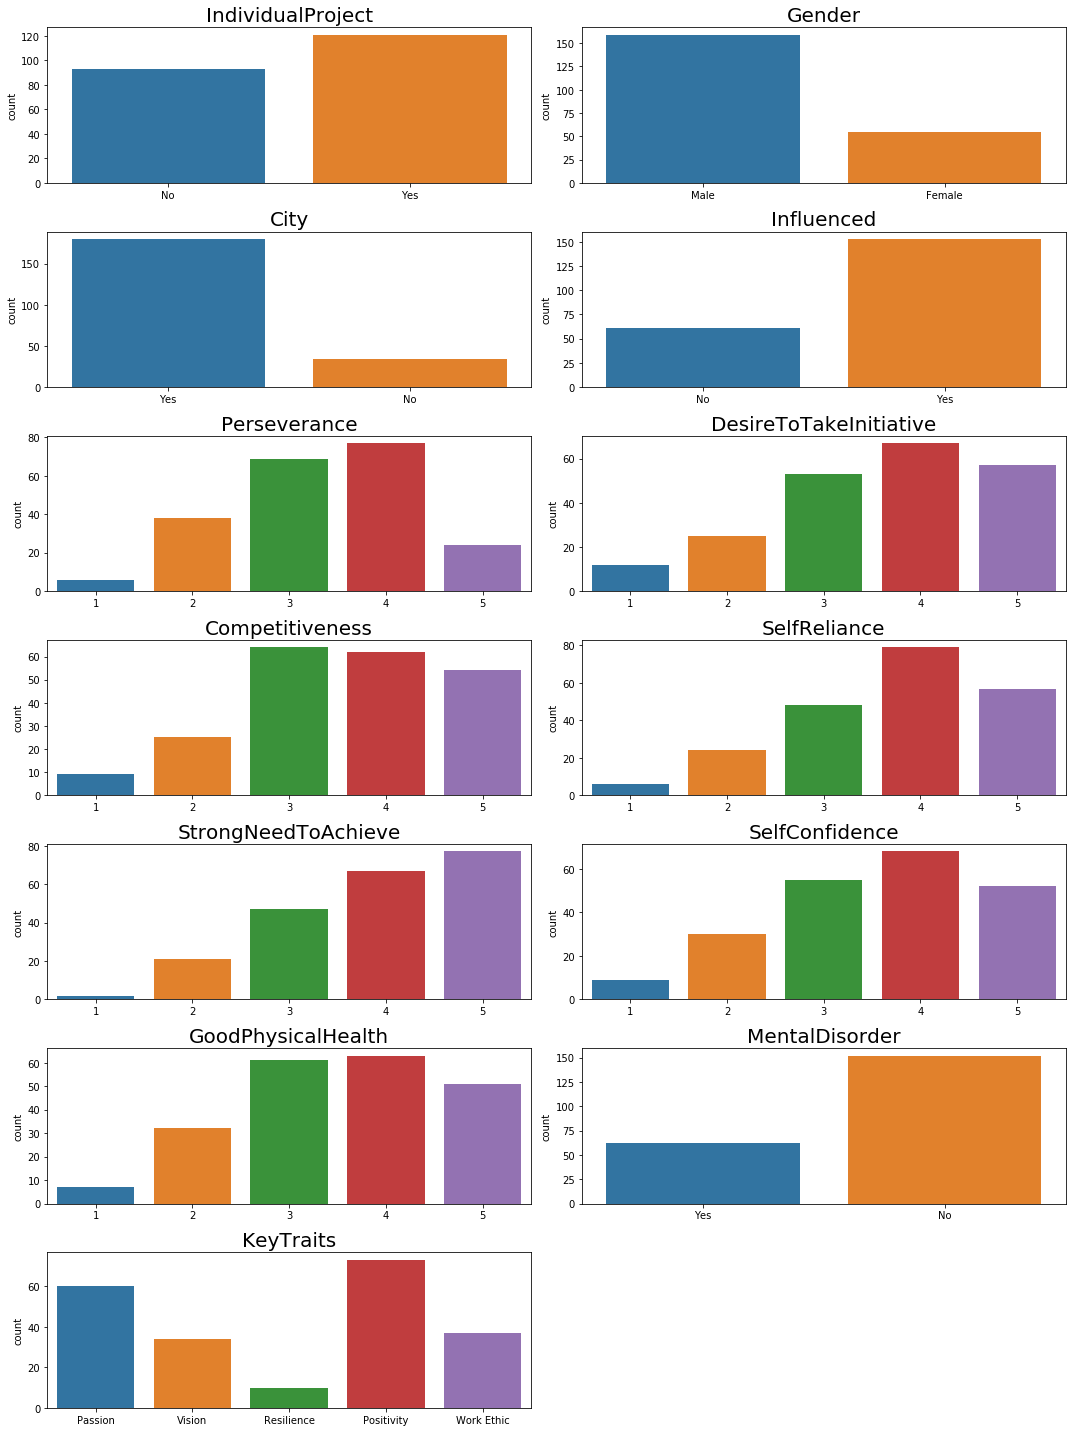

In [14]:
#Categorical features 
#starts with this question, what is the dominant value of each cat features?

fig = plt.figure(figsize=(15, 20))
for x in range(1,len(list(entre[categorical_features].columns))):
    ax = plt.subplot(7, 2, x)
    sns.countplot(entre[categorical_features[x]]) #, textprops={'fontsize': 20}
    plt.title(categorical_features[x], fontsize=20)
    plt.xlabel('')
    plt.tight_layout()
#fig.suptitle(year[x], fontsize=16, y=1.03)
plt.show()

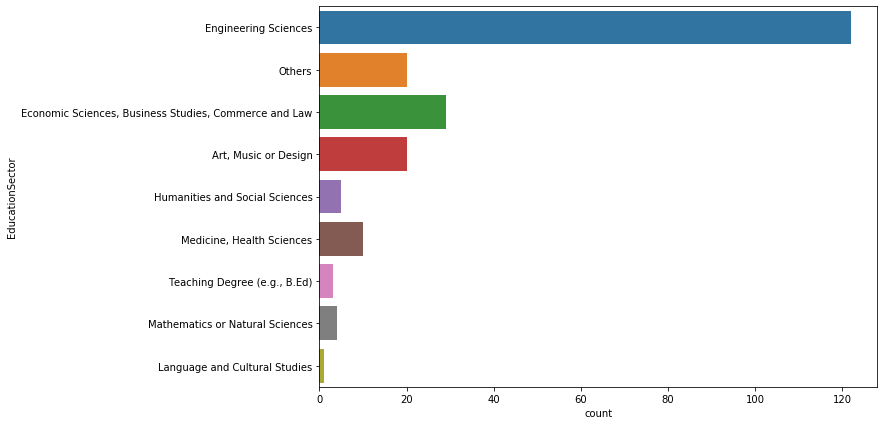

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(y = entre[categorical_features[0]])
plt.show()

## Categorical Univariate Analysis
    1. most of respondent are from engineering science major
    2. eventhough by small margin, more students have individual project than not
    3. There are more Male students than female, is it because the majority is engineering science students? have to check later
    4. more students stay in city than not
    5. most students are influenced by someone 

## Below is categorical data from survey given to students
    1. More students answer 3 or 4 in:
    Perseverance, Desire to take initiative, Competitiveness, self reliance, self confidence, good physical health
    2. Most Students feel the strong need to achieve something
    4. 2 of the most strong key traits for students are positivity and passion

## Target
### Balance Analysis


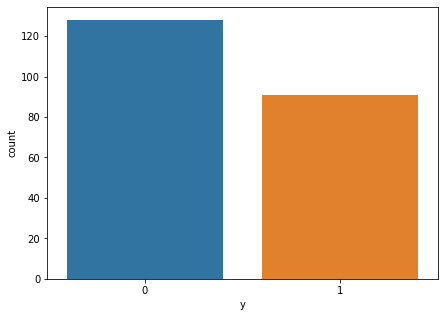

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(target)
plt.show()

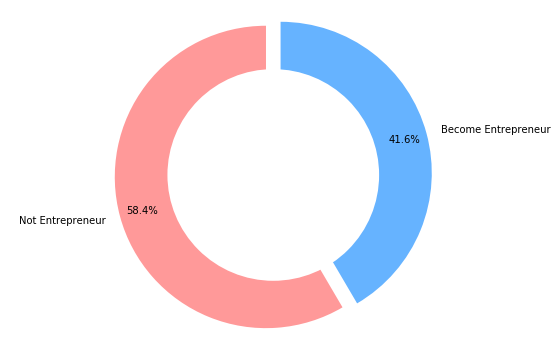

In [17]:
#fig, ax = plt.subplots(figsize=(10, 8))

translate_output = {'output' : {1: 'Become Entrepreneur',  0 : 'Not Entrepreneur'}}

# Pie chart
labels = list(target.value_counts().reset_index()['index'])
labels = [translate_output['output'][i] for i in labels]
sizes = list(target.value_counts().reset_index()['y'])

#colors
colors = ['#ff9999','#66b3ff']
#explsion
explode = (0.05,0.05)
fig, ax = plt.subplots(figsize=(8, 5)) 
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show() 

### analysis
    58.4% becomes entrepreneur vs 41.6% not entrepenreur
    it is the fact from the sample
    but this also means
    Imbalance in the target or the dataset itself is imbalance
    16.8% difference is huge. this will affect our model's accuracy

# Bivariate Analysis

## Numerical 

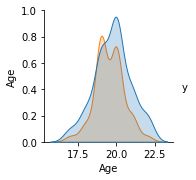

In [18]:
#try to use pairplot
sns.pairplot(pd.concat([entre[numerical_features], target], axis=1), hue='y')
plt.savefig('num_pairplot.png')
plt.show()

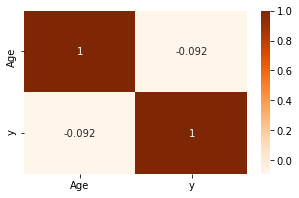

In [19]:
#heatmap
fig, ax = plt.subplots(figsize=(5, 3))
sns.heatmap(pd.concat([entre[numerical_features], target], axis=1).corr(),annot=True,cmap="Oranges",ax=ax)
plt.savefig('num_heatmap.png')
plt.show()

## Categorical

<Figure size 1152x1152 with 0 Axes>

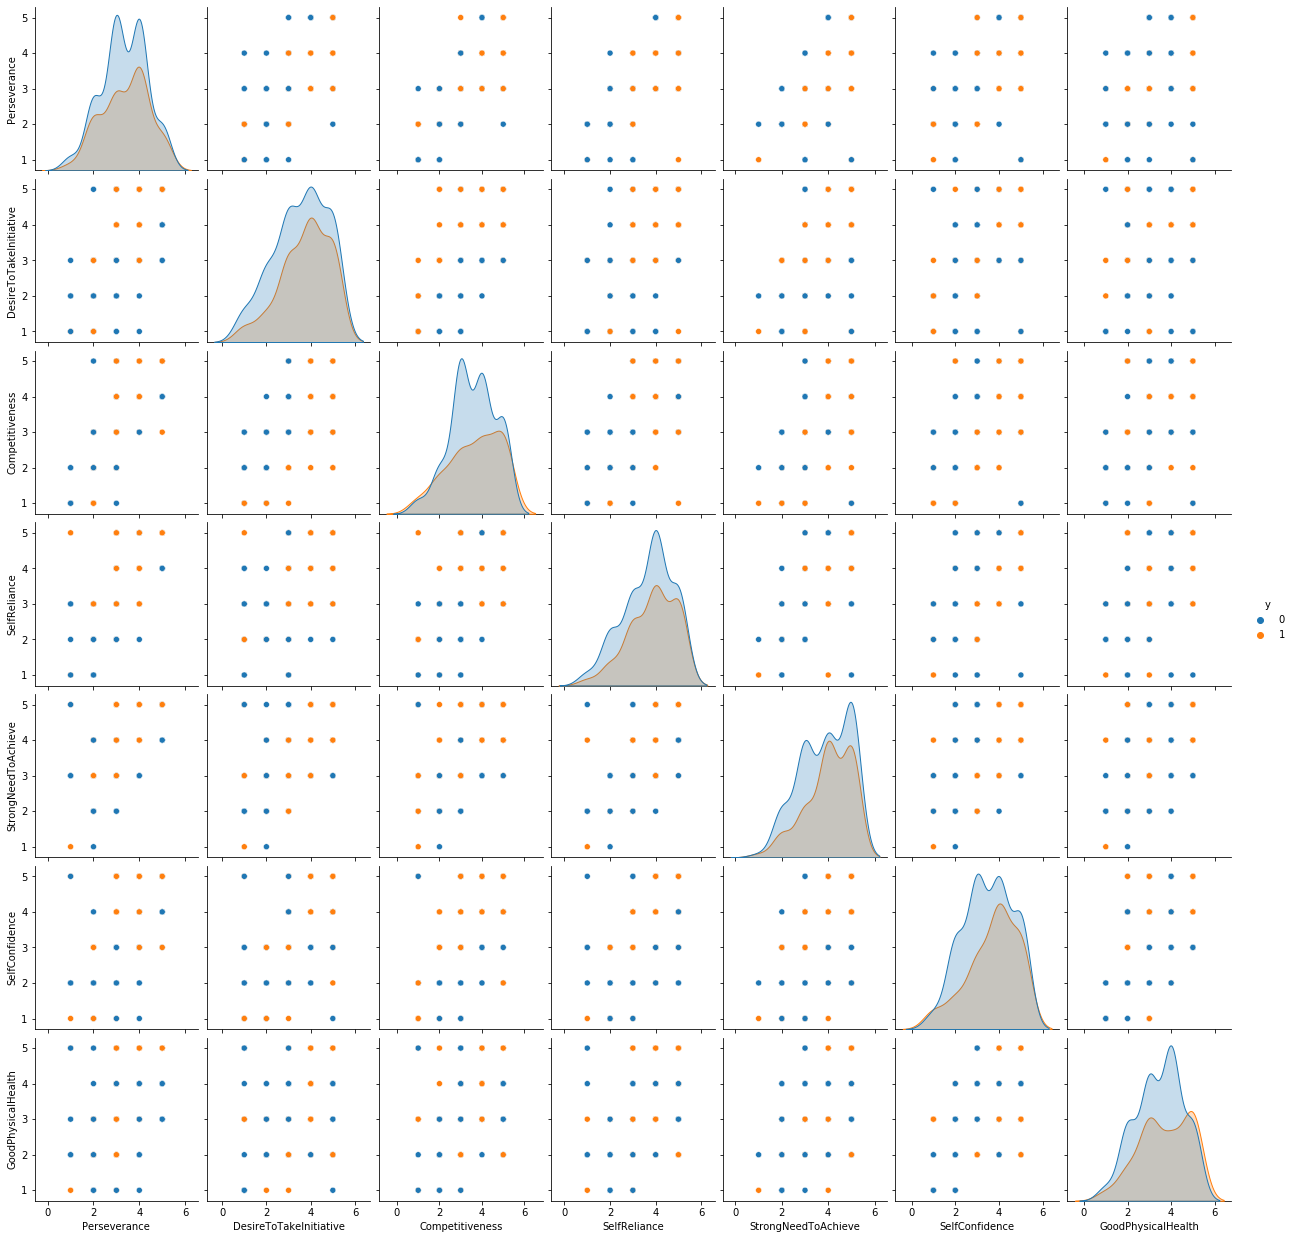

In [20]:
#try to use pairplot
fig1 = plt.figure(figsize=(16,16))
sns.pairplot(pd.concat([entre[categorical_features], target], axis=1), hue='y')
plt.savefig('cat_pairplot.png')
plt.show()


### Building Machine Learning Model

### Convert categorical features' yes and no values to Binary

In [21]:
categorical_features_to_change = ['IndividualProject', 'City', 'Influenced', 'MentalDisorder']
#'Gender'
#except for Gender, all is either yes or no
#and 'KeyTraits', its label encoding 

#we need to drop education sector later as it's not serve any purpose because it will make our dataset imbalance
for i in categorical_features_to_change:
    entre[i] = entre[i].apply(lambda x: 1 if 'Yes' else 0)

#for gender
entre['Gender'] = entre['Gender'].apply(lambda x : 0 if 'Male' else 1)

#perform manual label encoding, just like dummy variables in pandas instead of using sklearn
entre = entre.replace({'KeyTraits' : {'Passion' : 0, 'Vision' : 1, 'Resilience' : 2, 'Positivity' : 3, 'Work Ethic' : 4}})

#drop educationsector
entre.drop(['EducationSector'], axis=1, inplace=True)

In [22]:
entre.dtypes #ok everything is in order

IndividualProject         int64
Age                       int64
Gender                    int64
City                      int64
Influenced                int64
Perseverance              int64
DesireToTakeInitiative    int64
Competitiveness           int64
SelfReliance              int64
StrongNeedToAchieve       int64
SelfConfidence            int64
GoodPhysicalHealth        int64
MentalDisorder            int64
KeyTraits                 int64
y                         int64
dtype: object

### Mutual Information Score

In [23]:
target = entre['y'] #get our output
entre.drop(['y'], axis=1, inplace=True) #drop from entre df
def mi_scores(dataset, target):
    mutual_class = mutual_info_classif(dataset, target, random_state=42)
    mutual_class = pd.Series(mutual_class, name="mutual information scores", index=dataset.columns)
    mutual_class = mutual_class.sort_values(ascending=False)
    return mutual_class

mutual_info_score = mi_scores(entre, target)
mutual_info_score # show a few features with their MI scores

Competitiveness           0.038570
StrongNeedToAchieve       0.033352
KeyTraits                 0.028399
City                      0.022904
SelfConfidence            0.021387
GoodPhysicalHealth        0.020686
Gender                    0.014857
DesireToTakeInitiative    0.008868
MentalDisorder            0.001701
IndividualProject         0.000000
Age                       0.000000
Influenced                0.000000
Perseverance              0.000000
SelfReliance              0.000000
Name: mutual information scores, dtype: float64

Text(0.5, 1, 'Mutual Information Scores')

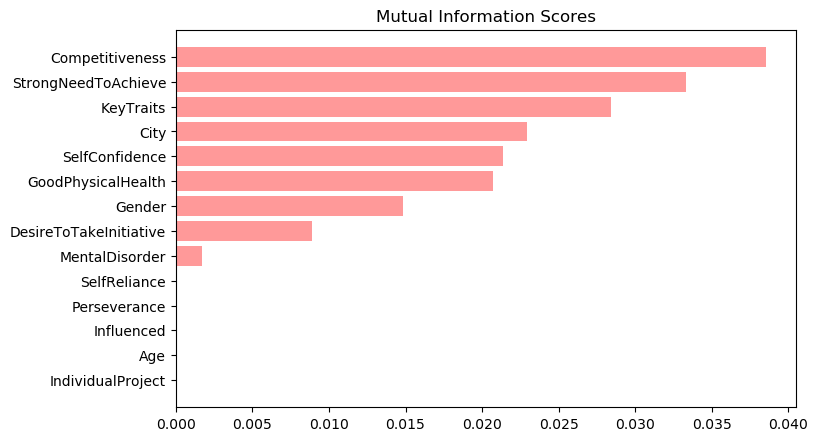

In [24]:
#plot MI
plt.figure(dpi=100, figsize=(8, 5))
mutual_info_score = mutual_info_score.sort_values(ascending=True)
width = np.arange(len(mutual_info_score))
ticks = list(mutual_info_score.index)
plt.barh(width, mutual_info_score, color= '#ff9999')
plt.yticks(width, ticks)
plt.savefig('mutual_information_score.png')
plt.title("Mutual Information Scores")

### Mutual information score analysis
    Competitiveness has the highest features score
    Self reliance, perseverance, influenced, age, and individual project has no impact
    so we're going yo use 8 features

In [25]:
#features to use
features = [i for i in entre.columns if i not in ['SelfReliance', 'Perseverance', 'Influenced', 'Age', 'Individual Project']]

entre = entre[features]

In [26]:
entre.head()
#as you can see all our features are already in either binary or label encoding form, 
#so no need to transform nor scaling them

,IndividualProject,Gender,City,DesireToTakeInitiative,Competitiveness,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits
0,1,0,1,2,3,2,2,3,1,0
1,1,0,1,3,3,4,3,4,1,1
2,1,0,1,4,3,3,4,4,1,0
3,1,0,1,3,3,4,3,3,1,2
4,1,0,1,3,3,4,3,2,1,1


## using keras deep learning model

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(entre, target, stratify=target, train_size=0.80)

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=[len(list(entre.columns))]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [29]:
#optimizer
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [30]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
1/1 [==============================] - 0s 294ms/step - loss: 0.8894 - binary_accuracy: 0.4912 - val_loss: 0.8016 - val_binary_accuracy: 0.3953
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.8089 - binary_accuracy: 0.5263 - val_loss: 0.7657 - val_binary_accuracy: 0.3953
Epoch 3/200
1/1 [==============================] - 0s 16ms/step - loss: 0.8007 - binary_accuracy: 0.5789 - val_loss: 0.7282 - val_binary_accuracy: 0.4186
Epoch 4/200
1/1 [==============================] - 0s 15ms/step - loss: 0.7847 - binary_accuracy: 0.5673 - val_loss: 0.7051 - val_binary_accuracy: 0.4419
Epoch 5/200
1/1 [==============================] - 0s 16ms/step - loss: 0.7985 - binary_accuracy: 0.5497 - val_loss: 0.6977 - val_binary_accuracy: 0.5349
Epoch 6/200
1/1 [==============================] - 0s 16ms/step - loss: 0.7004 - binary_accuracy: 0.6140 - val_loss: 0.6948 - val_binary_accuracy: 0.5581
Epoch 7/200
1/1 [==============================] - 0s 17ms/step - loss: 0.7

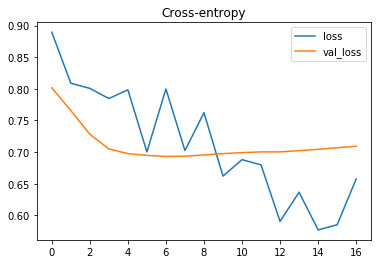

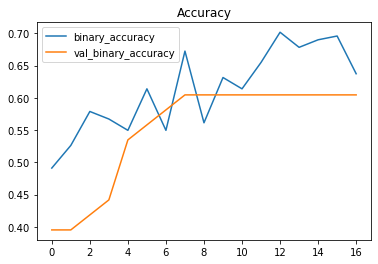

In [31]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
plt.show()

In [33]:
#Best validation loss and validation mae score
print(("Best Validation Loss: {:0.2f}" +"\nBest Validation accuracy: {:0.2f}").format(history_df['val_loss'].min(), history_df['val_binary_accuracy'].max()))

Best Validation Loss: 0.69
Best Validation accuracy: 0.60
